In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import sys

sys.path.append("/home/jupyter/zfp/lib")

In [9]:
!python -m pip install multiprocess

In [10]:
import numpy as np
from numba import njit
import zfpy
import sep_python
io=sep_python.default_io
bay=io.vector_from_storage("./a.H")


ImportError: libzfp.so.1: cannot open shared object file: No such file or directory

In [ ]:
print(bay.get_nd_array().shape)
zfp_c=zfpy.zfp_parallel(bay.get_nd_array().shape,"float32",3,block_size=1000*1000)
zfp_c.get_numpy_array()[:,:,:]=bay.get_nd_array()[:,:,:]
#comp=zfpy.compress_numpy(array,precision=10)

In [ ]:
%time zfp_c.compress(tolerance=.009)
zfp_c.get_numpy_array()[:,:,:]=0
#zfp_c.compress(precision=10)
%time zfp_c.decompress()



In [ ]:
print(len(zfp_c._compress_data))
tot=0
for v in zfp_c._compress_data:
    tot+=len(v)
print(tot,361*361*467*4)
print(361*361*467*4/tot)


In [ ]:

error_pct=0
max_errror=0
diff=bay.get_nd_array()-zfp_c.get_numpy_array()
diff_abs=np.abs(diff)
sm=np.sum(diff_abs)
print(np.max(diff_abs),sm,sm/361/361/467)


In [ ]:
import numpy as np
from numba import njit
import zfpy
# Parameters for the array dimensions
dims = (4, 500, 1000, 1000)

zfp_c=zfpy.zfp_parallel(dims,"float32",3,block_size=1000*1000)

@njit
def fill_array(array,sc1,sc2,sc3,sc4):
    ar1=np.cos(np.linspace(0,np.pi*2*sc1,num=array.shape[0]))
    ar2=np.cos(np.linspace(0,np.pi*2*sc2,num=array.shape[1]))
    ar3=np.cos(np.linspace(0,np.pi*2*sc3,num=array.shape[2]))
    ar4=np.cos(np.linspace(0,np.pi*2*sc4,num=array.shape[3]))

    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            for k in range(array.shape[2]):
                for l in range(array.shape[3]):
                    array[i,j,k,l]=ar1[i]*ar2[j]*ar3[k]*ar4[l]

# Creating an empty array of the specified dimensions and dtype float32
array = zfp_c.get_numpy_array()
fill_array(array,.2,3.,2,3.)                


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(array[2,:,23,:])

In [ ]:
comp=zfpy.compress_numpy(array,precision=10)
%timeit comp=zfpy.compress_numpy(array,precision=10)

In [7]:
array_out=zfpy.decompress_numpy(comp)
#%timeit array_out=zfpy.decompress_numpy(comp)




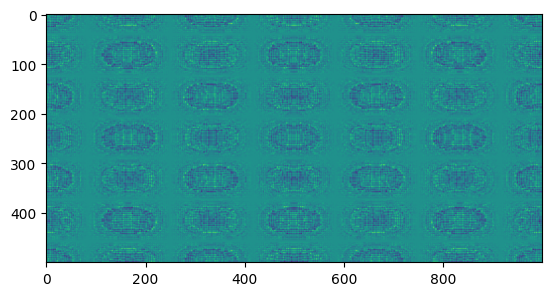

In [8]:
diff=array_out-array
plt.imshow(diff[2,:,23,:])

In [6]:
zfp_c.compress(precision=10)

In [7]:
import copy
orig=copy.deepcopy(zfp_c.get_numpy_array())

In [8]:
zfp_c.get_numpy_array()[:,:,:,:]=0
zfp_c.decompress()

In [9]:
print(len(zfp_c._compress_data))
tot=0
for i in range(250):
    tot+=len(zfp_c._compress_data[i])
print("total",tot)


250
total 141786528


In [10]:
uc=zfp_c.get_numpy_array()
print(uc[0,0,0,:4])

[0.9980469 0.9980469 0.9980469 0.9980469]


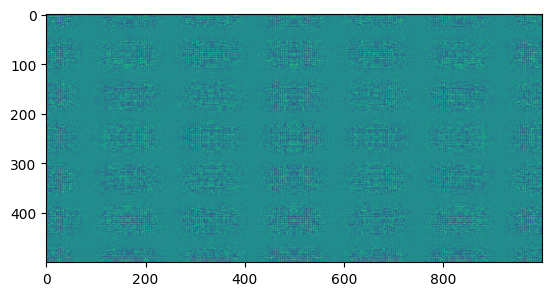

In [11]:
diff=orig-zfp_c.get_numpy_array()
plt.imshow(diff[0,:,0,:])

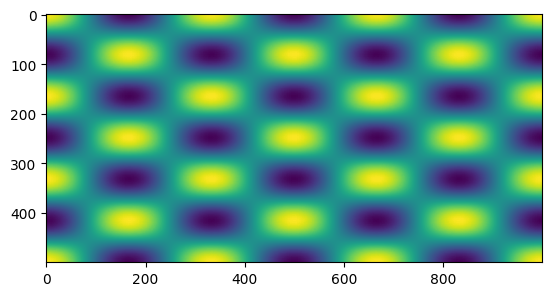

In [12]:
dec=zfp_c.get_numpy_array()
plt.imshow(dec[2,:,23,:])

In [13]:
print(orig[2,23,23,23],dec[2,23,23,23],diff[2,23,23,23])

0.3757322 0.36816406 0.0075681508


In [14]:
!ls /home/jupyter/scratch

aa
